# R-Q

## imports

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import sqlite3

In [4]:
import cymetric as cym
from cymetric import graphs
from cymetric import timeseries

In [5]:
fig_params = {'axes.labelsize': 11.5,
              'font.family': 'serif',
              'font.size': 10,
              'legend.fontsize': 11,
              'xtick.labelsize': 10.5,
              'ytick.labelsize': 11,
              'figure.figsize': [9, 6],
              'figure.titlesize': 14.5,
              'savefig.format': 'png',
              'savefig.bbox': 'tight'}
plt.rcParams.update(fig_params)

#palette = []
#sns.set_palette(sns.comor_palette(palette))

## utils
- includes behavior and default (no behavior) as comparison

In [6]:
def get_data(file):
    db = cym.dbopen(file)
    evaler = cym.Evaluator(db)
    
    name = os.path.splitext(file)[0]
    
    transactions = evaler.eval('TransactionQuantity')
    agents = evaler.eval('Agents')
    ei = evaler.eval('ExplicitInventory')
    
    storage_id = agents.loc[agents["Prototype"] == "Storage"]["AgentId"]
    transaction_received = transactions.loc[transactions["ReceiverId"] == storage_id.item()]
    transaction_sent = transactions.loc[transactions["SenderId"] == storage_id.item()]
    
    data = {'ev': evaler,
            'agents': agents,
            'transactions': transactions,
            't_r': transaction_received,
            't_s': transaction_sent,
            'ei': ei}
    
    return name, data

## input file names below

In [7]:
filenames = ['no-behavior.sqlite', 'R-Q.sqlite', 's-S.sqlite']

## grab all data

In [8]:
data = {}
for file in filenames:
    (name, file_data) = get_data(file)
    data[name] = file_data

# Plots
## transactions subplots

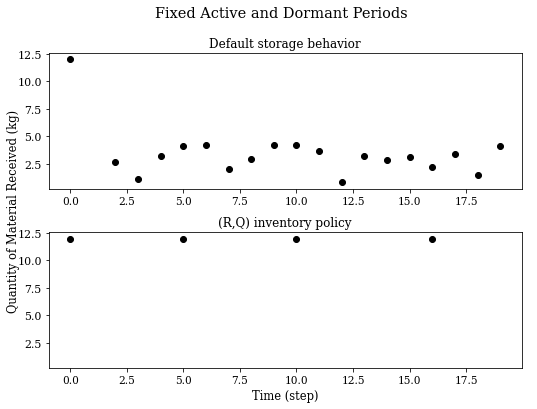

In [9]:
fig = plt.figure(figsize = (8, 6))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Quantity of Material Received (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

ax0 = fig.add_subplot(211)
# ax.set_xlabel('Time')
# ax.set_ylabel('Quantity Received')
# plt.xlim(-0.5,16)
# plt.ylim(0,9)
# ax0.set_xticks(np.arange(0, 16, 2))
# ax0.set_yticks(np.arange(0, 10, 2.5))

ax0.scatter(data['no-behavior']['t_r']['Time'],
            data['no-behavior']['t_r']['Quantity'],
            color= 'k')
ax0.set_title('Default storage behavior')

ax1 = fig.add_subplot(212, sharex=ax0, sharey=ax0)

ax1.scatter(data['R-Q']['t_r']['Time'],
            data['R-Q']['t_r']['Quantity'],
            color= 'k')
ax1.set_title('(R,Q) inventory policy')

fig.suptitle('Fixed Active and Dormant Periods', x=0.55)
fig.tight_layout()

#plt.savefig('plots/transactions-subplots', transparent=True)

## Cumulative received subplots

In [10]:
data['no-behavior']['t_r']['CumQuant'] = data['no-behavior']['t_r']['Quantity'].cumsum()
data['R-Q']['t_r']['CumQuant'] = data['R-Q']['t_r']['Quantity'].cumsum()

<ipython-input-10-05a236e4fc15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['no-behavior']['t_r']['CumQuant'] = data['no-behavior']['t_r']['Quantity'].cumsum()
<ipython-input-10-05a236e4fc15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['R-Q']['t_r']['CumQuant'] = data['R-Q']['t_r']['Quantity'].cumsum()


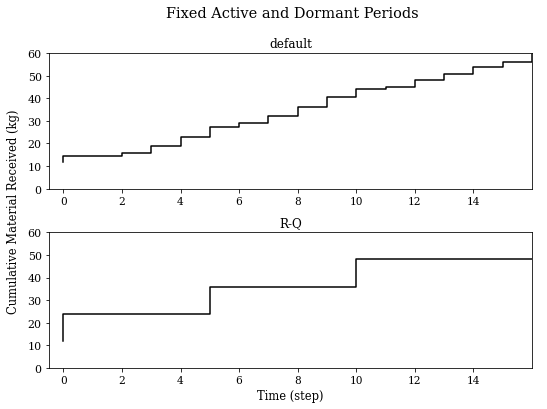

In [11]:
fig = plt.figure(figsize = (8, 6))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Cumulative Material Received (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

ax0 = fig.add_subplot(211)
# ax.set_xlabel('Time')
# ax.set_ylabel('Quantity Received')
plt.xlim(-0.5,16)
plt.ylim(0,60)
ax0.set_xticks(np.arange(0, 16, 2))
ax0.set_yticks(np.arange(0, 61, 10))


ax0.step(data['no-behavior']['t_r']['Time'],
         data['no-behavior']['t_r']['CumQuant'],
         color= 'k')
ax0.set_title('default')

ax1 = fig.add_subplot(212, sharex=ax0, sharey=ax0)


ax1.step(data['R-Q']['t_r']['Time'],
         data['R-Q']['t_r']['CumQuant'],
         color= 'k')
ax1.set_title('R-Q')

fig.suptitle('Fixed Active and Dormant Periods', x=0.55)
fig.tight_layout()

#plt.savefig('plots/cumulative-subplots', transparent=True)


## Cumulative single plot

Text(0.5, 1.0, 'Fixed Active and Dormant Periods')

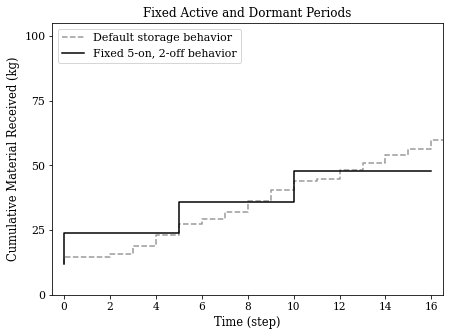

In [12]:
fig = plt.figure(figsize = (7, 5))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Cumulative Material Received (kg)')

plt.xlim(-0.5,16.5)
plt.ylim(0,105)
ax.set_xticks(np.arange(0, 17, 2))
ax.set_yticks(np.arange(0, 101, 25))


ax.step(data['no-behavior']['t_r']['Time'],
        data['no-behavior']['t_r']['CumQuant'],
        where='pre',
        color= '0.6', ls='dashed', label='Default storage behavior')

ax.step(data['R-Q']['t_r']['Time'],
        data['R-Q']['t_r']['CumQuant'],
        where='pre',
        color= 'k', label='Fixed 5-on, 2-off behavior')

ax.legend(loc = 'upper left')

plt.title('Fixed Active and Dormant Periods')

#plt.savefig('plots/cumulative-oneplot', transparent=True)

# In and out plots

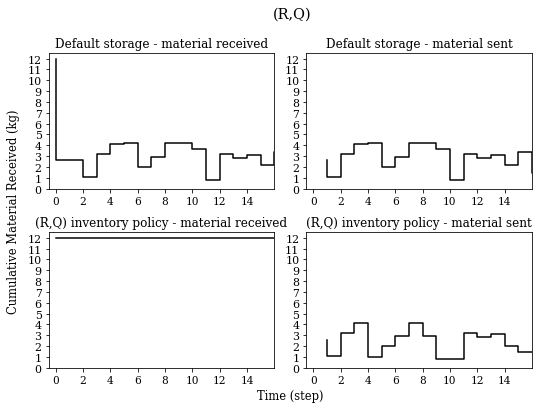

In [13]:
fig = plt.figure(figsize = (8, 6))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Cumulative Material Received (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

#
# upper left - nobehav in
ax0 = fig.add_subplot(221)
# ax.set_xlabel('Time')
# ax.set_ylabel('Quantity Received')
plt.xlim(-0.5,16)
plt.ylim(0,12.5)
ax0.set_xticks(np.arange(0, 16, 2))
ax0.set_yticks(np.arange(0, 13, 1))


ax0.step(data['no-behavior']['t_r']['Time'],
         data['no-behavior']['t_r']['Quantity'],
         color= 'k')
ax0.set_title('Default storage - material received')

#
# upper right - nobehav out
ax1 = fig.add_subplot(222, sharex=ax0, sharey=ax0)

ax1.step(data['no-behavior']['t_s']['Time'],
         data['no-behavior']['t_s']['Quantity'],
         color= 'k')
ax1.set_title('Default storage - material sent')

#
# lower levt - behav in
ax2 = fig.add_subplot(223, sharex=ax0, sharey=ax0)

ax2.step(data['R-Q']['t_r']['Time'],
         data['R-Q']['t_r']['Quantity'],
         color= 'k')
ax2.set_title('(R,Q) inventory policy - material received')

#
# lower right - behav out
ax3 = fig.add_subplot(224, sharex=ax0, sharey=ax0)

ax3.step(data['R-Q']['t_s']['Time'],
         data['R-Q']['t_s']['Quantity'],
         color= 'k')
ax3.set_title('(R,Q) inventory policy - material sent')
#plt.savefig('plots/in-and-out', transparent=True)

fig.suptitle('(R,Q)', x=0.55)
fig.tight_layout()



# Inventory plots
## get net (in positive, out neg

In [14]:
data['no-behavior']['transactions']['Net'] = np.where(
    data['no-behavior']['transactions']['ReceiverId']==13,
    data['no-behavior']['transactions']['Quantity'],
    -data['no-behavior']['transactions']['Quantity']
)

data['R-Q']['transactions']['Net'] = np.where(
    data['R-Q']['transactions']['ReceiverId']==13,
    data['R-Q']['transactions']['Quantity'],
    -data['R-Q']['transactions']['Quantity']
)

data['s-S']['transactions']['Net'] = np.where(
    data['s-S']['transactions']['ReceiverId']==13,
    data['s-S']['transactions']['Quantity'],
    -data['s-S']['transactions']['Quantity']
)

data['no-behavior']['transactions'].head(8)

,SimId,TransactionId,ResourceId,ObjId,TimeCreated,Time,SenderId,ReceiverId,Commodity,Units,Quantity,Net
0,9c8d86fc-b2af-4f6f-a190-8d44cb9f179e,0,6,5,0,0,12,13,commodity,kg,12.000000,12.000000
1,9c8d86fc-b2af-4f6f-a190-8d44cb9f179e,1,11,8,1,1,13,14,commodity1,kg,2.609284,-2.609284
2,9c8d86fc-b2af-4f6f-a190-8d44cb9f179e,2,18,14,2,2,12,13,commodity,kg,2.609284,2.609284
3,9c8d86fc-b2af-4f6f-a190-8d44cb9f179e,3,21,15,2,2,13,14,commodity1,kg,1.086158,-1.086158
4,9c8d86fc-b2af-4f6f-a190-8d44cb9f179e,4,28,21,3,3,12,13,commodity,kg,1.086158,1.086158
5,9c8d86fc-b2af-4f6f-a190-8d44cb9f179e,5,32,14,3,3,13,14,commodity1,kg,3.167860,-3.167860
6,9c8d86fc-b2af-4f6f-a190-8d44cb9f179e,6,39,28,4,4,12,13,commodity,kg,3.167860,3.167860
7,9c8d86fc-b2af-4f6f-a190-8d44cb9f179e,7,43,21,4,4,13,14,commodity1,kg,4.125685,-4.125685


## get net per time

In [18]:
data['no-behavior']['Net'] = pd.DataFrame(
    data['no-behavior']['transactions'].groupby('Time')['Net'].sum().cumsum(), columns=['Net']).reset_index()

data['R-Q']['Net'] = pd.DataFrame(
    data['R-Q']['transactions'].groupby('Time')['Net'].sum().cumsum(), columns=['Net']).reset_index()

data['s-S']['Net'] = pd.DataFrame(
    data['s-S']['transactions'].groupby('Time')['Net'].sum().cumsum(), columns=['Net']).reset_index()

In [ ]:
# data['no-behavior']['Net'].loc[0, 'Net'] = 0
# data['behavior-example']['Net'].loc[0,'Net'] = 0

## up-down bar plots RQ only

Text(0.55, 0.98, 'Fixed Active and Dormant Periods')

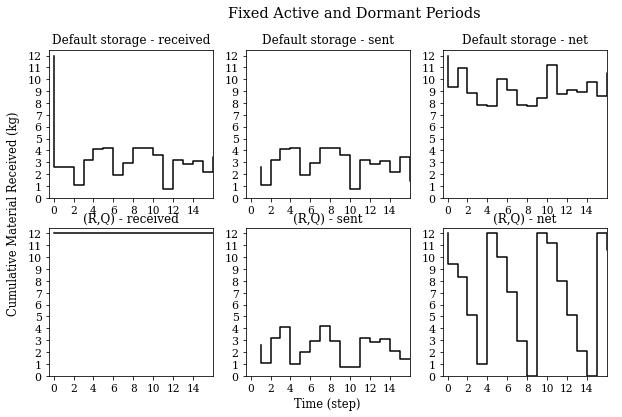

In [19]:
fig = plt.figure(figsize = (10, 6))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Cumulative Material Received (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

#
# upper left - nobehav in
ax0 = fig.add_subplot(231)
# ax.set_xlabel('Time')
# ax.set_ylabel('Quantity Received')
plt.xlim(-0.5,16)
plt.ylim(0,12.5)
ax0.set_xticks(np.arange(0, 16, 2))
ax0.set_yticks(np.arange(0, 13, 1))


ax0.step(data['no-behavior']['t_r']['Time'],
         data['no-behavior']['t_r']['Quantity'],
         color= 'k')
ax0.set_title('Default storage - received')

#
# upper middle - nobehav out
ax1 = fig.add_subplot(232, sharex=ax0, sharey=ax0)

ax1.step(data['no-behavior']['t_s']['Time'],
         data['no-behavior']['t_s']['Quantity'],
         color= 'k')
ax1.set_title('Default storage - sent')

#
# upper right - nobehav out
ax2 = fig.add_subplot(233, sharex=ax0, sharey=ax0)

ax2.step(data['no-behavior']['Net']['Time'],
         data['no-behavior']['Net']['Net'],
         color= 'k')
ax2.set_title('Default storage - net')

#
# lower levt - behav in
ax3 = fig.add_subplot(234, sharex=ax0, sharey=ax0)

ax3.step(data['R-Q']['t_r']['Time'],
         data['R-Q']['t_r']['Quantity'],
         color= 'k')
ax3.set_title('(R,Q) - received')

#
# lower middle - behav out
ax4 = fig.add_subplot(235, sharex=ax0, sharey=ax0)

ax4.step(data['R-Q']['t_s']['Time'],
         data['R-Q']['t_s']['Quantity'],
         color= 'k')
ax4.set_title('(R,Q) - sent')

#
# lower right - behav net
ax4 = fig.add_subplot(236, sharex=ax0, sharey=ax0)

ax4.step(data['R-Q']['Net']['Time'],
         data['R-Q']['Net']['Net'],
         color= 'k')
ax4.set_title('(R,Q) - net')

#
#
#plt.savefig('plots/in-and-out', transparent=True)

fig.suptitle('Fixed Active and Dormant Periods', x=0.55)
#fig.tight_layout()



Text(0.55, 0.98, 'Fixed Active and Dormant Periods')

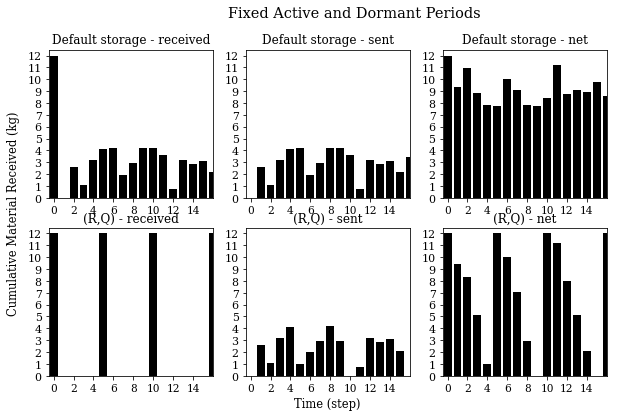

In [20]:
fig = plt.figure(figsize = (10, 6))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Cumulative Material Received (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

#
# upper left - nobehav in
ax0 = fig.add_subplot(231)
# ax.set_xlabel('Time')
# ax.set_ylabel('Quantity Received')
plt.xlim(-0.5,16)
plt.ylim(0,12.5)
ax0.set_xticks(np.arange(0, 16, 2))
ax0.set_yticks(np.arange(0, 13, 1))


ax0.bar(data['no-behavior']['t_r']['Time'],
         data['no-behavior']['t_r']['Quantity'],
         color= 'k')
ax0.set_title('Default storage - received')

#
# upper middle - nobehav out
ax1 = fig.add_subplot(232, sharex=ax0, sharey=ax0)

ax1.bar(data['no-behavior']['t_s']['Time'],
         data['no-behavior']['t_s']['Quantity'],
         color= 'k')
ax1.set_title('Default storage - sent')

#
# upper right - nobehav out
ax2 = fig.add_subplot(233, sharex=ax0, sharey=ax0)

ax2.bar(data['no-behavior']['Net']['Time'],
         data['no-behavior']['Net']['Net'],
         color= 'k')
ax2.set_title('Default storage - net')

#
# lower levt - behav in
ax3 = fig.add_subplot(234, sharex=ax0, sharey=ax0)

ax3.bar(data['R-Q']['t_r']['Time'],
         data['R-Q']['t_r']['Quantity'],
         color= 'k')
ax3.set_title('(R,Q) - received')

#
# lower middle - behav out
ax4 = fig.add_subplot(235, sharex=ax0, sharey=ax0)

ax4.bar(data['R-Q']['t_s']['Time'],
         data['R-Q']['t_s']['Quantity'],
         color= 'k')
ax4.set_title('(R,Q) - sent')

#
# lower right - behav net
ax4 = fig.add_subplot(236, sharex=ax0, sharey=ax0)

ax4.bar(data['R-Q']['Net']['Time'],
         data['R-Q']['Net']['Net'],
         color= 'k')
ax4.set_title('(R,Q) - net')

#
#
#plt.savefig('plots/in-and-out', transparent=True)

fig.suptitle('Fixed Active and Dormant Periods', x=0.55)
#fig.tight_layout()



Text(0.515, 0.98, '(R,Q) inventory policy')

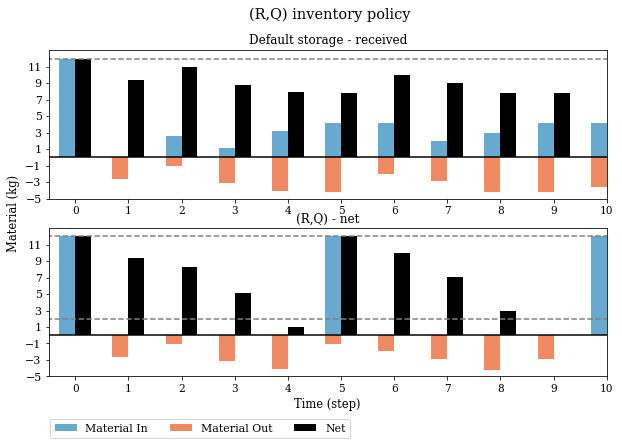

In [21]:
palette = ['#67a9cf', '#ef8a62']

fig = plt.figure(figsize = (10, 6))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Material (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

#
# upper left - nobehav in
ax0 = fig.add_subplot(211)
# ax.set_xlabel('Time')
# ax.set_ylabel('Quantity Received')
plt.xlim(-0.5,10)
plt.ylim(-5,13)
ax0.set_xticks(np.arange(0, 11, 1))
ax0.set_yticks(np.arange(-5, 13, 2))

ax0.hlines(y=[0,12], xmin=-2,xmax=11, colors=['k', 'gray'], linestyles=['solid', 'dashed'])

ax0.bar(data['no-behavior']['t_r']['Time']-0.15,
         data['no-behavior']['t_r']['Quantity'],
         color= palette[0],
       label='received',
       width=0.3)
ax0.set_title('Default storage - received')

ax0.bar(data['no-behavior']['t_s']['Time']-0.15,
         -data['no-behavior']['t_s']['Quantity'],
         color= palette[1],
       label='sent',
       width=0.3)


ax0.bar(data['no-behavior']['Net']['Time']+0.15,
         data['no-behavior']['Net']['Net'],
         color= 'k',
       label='net',
       width=0.3)


# #
# # lower levt - behav in
ax3 = fig.add_subplot(212, sharex=ax0, sharey=ax0)

ax3.hlines(y=[0,2,12], xmin=-2,xmax=11, colors=['k', 'gray', 'gray'], linestyles=['solid', 'dashed', 'dashed'], label='_nolegend_')

ax3.bar(data['R-Q']['t_r']['Time']-0.15,
         data['R-Q']['t_r']['Quantity'],
         color= palette[0],
       label='received',
       width=0.3)
ax3.set_title('(R,Q) - received')

#
# lower middle - behav out
ax3.bar(data['R-Q']['t_s']['Time']-0.15,
         -data['R-Q']['t_s']['Quantity'],
         color= palette[1],
       label='sent',
       width=0.3)
ax3.set_title('(R,Q) - sent')

#
# lower right - behav net
ax3.bar(data['R-Q']['Net']['Time']+0.15,
         data['R-Q']['Net']['Net'],
         color= 'k',
       label='net',
       width=0.3)

ax3.set_title('(R,Q) - net')

ax3.legend(['Material In', 'Material Out', 'Net'], ncol=3, fancybox=True, bbox_to_anchor=(0.55,-0.25))
#
#
#plt.savefig('plots/in-and-out', transparent=True)

fig.suptitle('(R,Q) inventory policy', x=0.515)
#fig.tight_layout()



## up down plots with s-S 

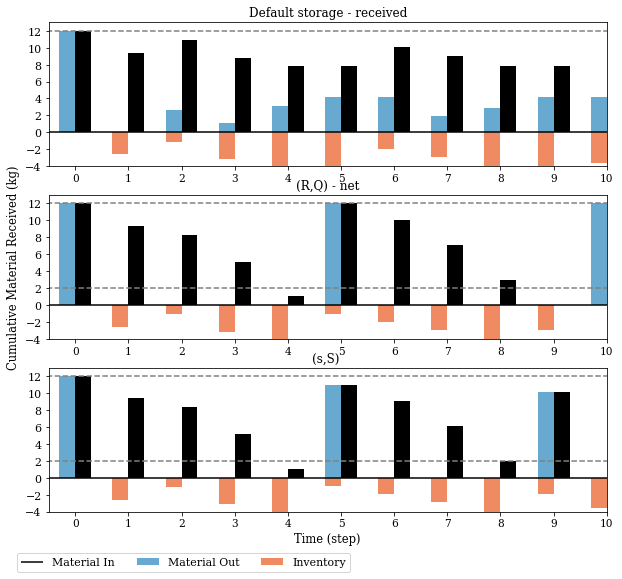

In [22]:
palette = ['#67a9cf', '#ef8a62']

fig = plt.figure(figsize = (10, 9))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Cumulative Material Received (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

#
# upper left - nobehav in
ax0 = fig.add_subplot(311)
# ax.set_xlabel('Time')
# ax.set_ylabel('Quantity Received')
plt.xlim(-0.5,10)
plt.ylim(-4,13)
ax0.set_xticks(np.arange(0, 11, 1))
ax0.set_yticks(np.arange(-4, 13, 2))

ax0.hlines(y=[0,12], xmin=-2,xmax=11, colors=['k', 'gray'], linestyles=['solid', 'dashed'])

ax0.bar(data['no-behavior']['t_r']['Time']-0.15,
         data['no-behavior']['t_r']['Quantity'],
         color= palette[0],
       label='received',
       width=0.3)
ax0.set_title('Default storage - received')

ax0.bar(data['no-behavior']['t_s']['Time']-0.15,
         -data['no-behavior']['t_s']['Quantity'],
         color= palette[1],
       label='sent',
       width=0.3)


ax0.bar(data['no-behavior']['Net']['Time']+0.15,
         data['no-behavior']['Net']['Net'],
         color= 'k',
       label='net',
       width=0.3)


# #
# # behav in
ax1 = fig.add_subplot(312, sharex=ax0, sharey=ax0)

ax1.hlines(y=[0,2,12], xmin=-2,xmax=11, colors=['k', 'gray', 'gray'], linestyles=['solid', 'dashed', 'dashed'])

ax1.bar(data['R-Q']['t_r']['Time']-0.15,
         data['R-Q']['t_r']['Quantity'],
         color= palette[0],
       label='received',
       width=0.3)
ax1.set_title('(R,Q) - received')

#
# behav out
ax1.bar(data['R-Q']['t_s']['Time']-0.15,
         -data['R-Q']['t_s']['Quantity'],
         color= palette[1],
       label='sent',
       width=0.3)
ax1.set_title('(R,Q) - sent')

#
# behav net
ax1.bar(data['R-Q']['Net']['Time']+0.15,
         data['R-Q']['Net']['Net'],
         color= 'k',
       label='net',
       width=0.3)

ax1.set_title('(R,Q) - net')

#
# #
# # behav in
ax2 = fig.add_subplot(313, sharex=ax0, sharey=ax0)

ax2.hlines(y=[0,2,12], xmin=-2,xmax=11, colors=['k', 'gray', 'gray'], linestyles=['solid', 'dashed', 'dashed'])

ax2.bar(data['s-S']['t_r']['Time']-0.15,
         data['s-S']['t_r']['Quantity'],
         color= palette[0],
       label='received',
       width=0.3)
#ax2.set_title('(s,S) - received')

#
# behav out
ax2.bar(data['s-S']['t_s']['Time']-0.15,
         -data['s-S']['t_s']['Quantity'],
         color= palette[1],
       label='sent',
       width=0.3)
#ax2.set_title('(s,S) - sent')

#
# behav net
ax2.bar(data['s-S']['Net']['Time']+0.15,
         data['s-S']['Net']['Net'],
         color= 'k',
       label='net',
       width=0.3)

ax2.set_title('(s,S) ')

ax2.legend(['Material In', 'Material Out', 'Inventory'], ncol=3, fancybox=True, bbox_to_anchor=(0.55,-0.25))
#
#
#plt.savefig('plots/in-and-out', transparent=True)

#fig.suptitle('(R,Q) inventory policy', x=0.515)
#fig.tight_layout()



### ANS fig

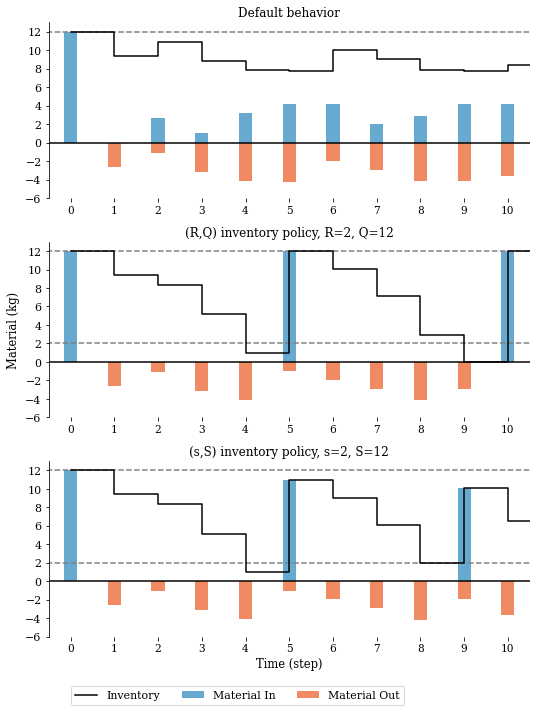

In [24]:
palette = ['#67a9cf', '#ef8a62']

fig = plt.figure(figsize = (8, 10.5))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Material (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='none', top= False, bottom= False, left= False, right= False)

#
# upper left - nobehav in
ax0 = fig.add_subplot(311)
# ax0.set_xlabel('Time (step)')
# ax0.set_ylabel('Material (kg)')
plt.xlim(-0.5,10.5)
plt.ylim(-6,13)
ax0.set_xticks(np.arange(0, 11, 1))
ax0.set_yticks(np.arange(-6, 13, 2))

ax0.spines['top'].set_color('none')
ax0.spines['bottom'].set_color('none')
ax0.spines['right'].set_color('none')

ax0.hlines(y=[0,12], xmin=-2,xmax=11, colors=['k', 'gray'], linestyles=['solid', 'dashed'])

ax0.bar(data['no-behavior']['t_r']['Time'],
         data['no-behavior']['t_r']['Quantity'],
         color= palette[0],
       label='received',
       width=0.3)
ax0.set_title('Default behavior')

ax0.bar(data['no-behavior']['t_s']['Time'],
         -data['no-behavior']['t_s']['Quantity'],
         color= palette[1],
       label='sent',
       width=0.3)


ax0.step(data['no-behavior']['Net']['Time'],
         data['no-behavior']['Net']['Net'],
         where='post',
         color= 'k')


# #
# # behav in
ax1 = fig.add_subplot(312, sharex=ax0, sharey=ax0)
ax1.spines['top'].set_color('none')
ax1.spines['bottom'].set_color('none')
ax1.spines['right'].set_color('none')

ax1.hlines(y=[0,2,12], xmin=-2,xmax=11, colors=['k', 'gray', 'gray'], linestyles=['solid', 'dashed', 'dashed'])

ax1.bar(data['R-Q']['t_r']['Time'],
         data['R-Q']['t_r']['Quantity'],
         color= palette[0],
       label='received',
       width=0.3)
ax1.set_title('(R,Q) - received')

#
# behav out
ax1.bar(data['R-Q']['t_s']['Time'],
         -data['R-Q']['t_s']['Quantity'],
         color= palette[1],
       label='sent',
       width=0.3)
ax1.set_title('(R,Q) - sent')

#
# behav net
ax1.step(data['R-Q']['Net']['Time'],
         data['R-Q']['Net']['Net'],
         where='post',
         color= 'k')

ax1.set_title('(R,Q) inventory policy, R=2, Q=12')

#
# #
# # behav in
ax2 = fig.add_subplot(313, sharex=ax0, sharey=ax0)
ax2.spines['top'].set_color('none')
ax2.spines['bottom'].set_color('none')
ax2.spines['right'].set_color('none')

ax2.hlines(y=[0,2,12], xmin=-2,xmax=11, colors=['k', 'gray', 'gray'], linestyles=['solid', 'dashed', 'dashed'], label='_nolegend_')

ax2.bar(data['s-S']['t_r']['Time'],
         data['s-S']['t_r']['Quantity'],
         color= palette[0],
       label='received',
       width=0.3)
#ax2.set_title('(s,S) - received')

#
# behav out
ax2.bar(data['s-S']['t_s']['Time'],
         -data['s-S']['t_s']['Quantity'],
         color= palette[1],
       label='sent',
       width=0.3)
#ax2.set_title('(s,S) - sent')

#
# behav net
ax2.step(data['s-S']['Net']['Time'],
         data['s-S']['Net']['Net'],
         where='post',
         color= 'k')

ax2.set_title('(s,S) inventory policy, s=2, S=12')

ax2.legend(['Inventory', 'Material In', 'Material Out', 'Inventory'], ncol=3,
           fancybox=True, bbox_to_anchor=(0.75,-0.25))
#
#
plt.savefig('plots/comparing-default-RQ-sS-ans', transparent=True, dpi=600)

#fig.suptitle('(R,Q) inventory policy', x=0.515)
fig.tight_layout()



### dis

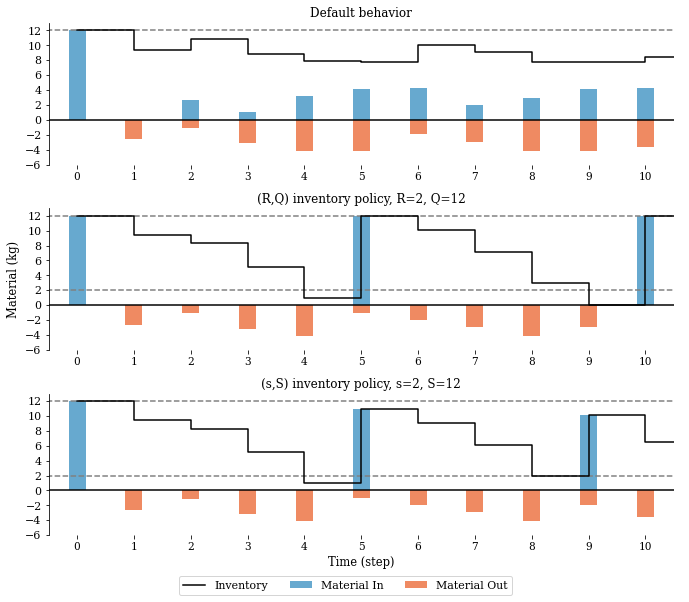

In [27]:
palette = ['#67a9cf', '#ef8a62']

fig = plt.figure(figsize = (10, 9))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Material (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='none', top= False, bottom= False, left= False, right= False)

#
# upper left - nobehav in
ax0 = fig.add_subplot(311)
# ax0.set_xlabel('Time (step)')
# ax0.set_ylabel('Material (kg)')
plt.xlim(-0.5,10.5)
plt.ylim(-6,13)
ax0.set_xticks(np.arange(0, 11, 1))
ax0.set_yticks(np.arange(-6, 13, 2))

ax0.spines['top'].set_color('none')
ax0.spines['bottom'].set_color('none')
ax0.spines['right'].set_color('none')

ax0.hlines(y=[0,12], xmin=-2,xmax=11, colors=['k', 'gray'], linestyles=['solid', 'dashed'])

ax0.bar(data['no-behavior']['t_r']['Time'],
         data['no-behavior']['t_r']['Quantity'],
         color= palette[0],
       label='received',
       width=0.3)
ax0.set_title('Default behavior')

ax0.bar(data['no-behavior']['t_s']['Time'],
         -data['no-behavior']['t_s']['Quantity'],
         color= palette[1],
       label='sent',
       width=0.3)


ax0.step(data['no-behavior']['Net']['Time'],
         data['no-behavior']['Net']['Net'],
         where='post',
         color= 'k')


# #
# # behav in
ax1 = fig.add_subplot(312, sharex=ax0, sharey=ax0)
ax1.spines['top'].set_color('none')
ax1.spines['bottom'].set_color('none')
ax1.spines['right'].set_color('none')

ax1.hlines(y=[0,2,12], xmin=-2,xmax=11, colors=['k', 'gray', 'gray'], linestyles=['solid', 'dashed', 'dashed'])

ax1.bar(data['R-Q']['t_r']['Time'],
         data['R-Q']['t_r']['Quantity'],
         color= palette[0],
       label='received',
       width=0.3)
ax1.set_title('(R,Q) - received')

#
# behav out
ax1.bar(data['R-Q']['t_s']['Time'],
         -data['R-Q']['t_s']['Quantity'],
         color= palette[1],
       label='sent',
       width=0.3)
ax1.set_title('(R,Q) - sent')

#
# behav net
ax1.step(data['R-Q']['Net']['Time'],
         data['R-Q']['Net']['Net'],
         where='post',
         color= 'k')

ax1.set_title('(R,Q) inventory policy, R=2, Q=12')

#
# #
# # behav in
ax2 = fig.add_subplot(313, sharex=ax0, sharey=ax0)
ax2.spines['top'].set_color('none')
ax2.spines['bottom'].set_color('none')
ax2.spines['right'].set_color('none')

ax2.hlines(y=[0,2,12], xmin=-2,xmax=11, colors=['k', 'gray', 'gray'], linestyles=['solid', 'dashed', 'dashed'], label='_nolegend_')

ax2.bar(data['s-S']['t_r']['Time'],
         data['s-S']['t_r']['Quantity'],
         color= palette[0],
       label='received',
       width=0.3)
#ax2.set_title('(s,S) - received')

#
# behav out
ax2.bar(data['s-S']['t_s']['Time'],
         -data['s-S']['t_s']['Quantity'],
         color= palette[1],
       label='sent',
       width=0.3)
#ax2.set_title('(s,S) - sent')

#
# behav net
ax2.step(data['s-S']['Net']['Time'],
         data['s-S']['Net']['Net'],
         where='post',
         color= 'k')

ax2.set_title('(s,S) inventory policy, s=2, S=12')

ax2.legend(['Inventory', 'Material In', 'Material Out', 'Inventory'], ncol=3,
           fancybox=True, bbox_to_anchor=(0.75,-0.25))
#
#
plt.savefig('plots/comparing-default-RQ-sS-diss', transparent=True, dpi=600)

#fig.suptitle('(R,Q) inventory policy', x=0.515)
fig.tight_layout()



## other

Text(0.55, 0.98, 'Fixed Active and Dormant Periods')

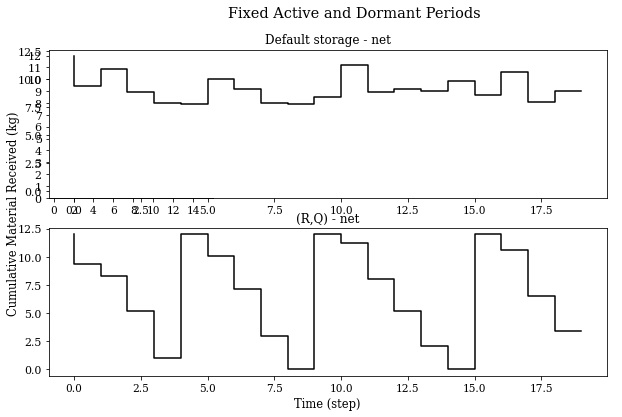

In [26]:
fig = plt.figure(figsize = (10, 6))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Cumulative Material Received (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

#
# upper left - nobehav in
ax0 = fig.add_subplot(231)
# ax.set_xlabel('Time')
# ax.set_ylabel('Quantity Received')
plt.xlim(-0.5,16)
plt.ylim(0,12.5)
ax0.set_xticks(np.arange(0, 16, 2))
ax0.set_yticks(np.arange(0, 13, 1))

#
# upper right - nobehav out
ax0 = fig.add_subplot(211)

ax0.step(data['no-behavior']['Net']['Time'],
         data['no-behavior']['Net']['Net'],
         color= 'k')
ax0.set_title('Default storage - net')


#
# lower right - behav net
ax4 = fig.add_subplot(212, sharex=ax0, sharey=ax0)

ax4.step(data['R-Q']['Net']['Time'],
         data['R-Q']['Net']['Net'],
         color= 'k')
ax4.set_title('(R,Q) - net')

#
#
#plt.savefig('plots/in-and-out', transparent=True)

fig.suptitle('Fixed Active and Dormant Periods', x=0.55)
#fig.tight_layout()



In [21]:
data['behavior-example']['transactions']

,SimId,TransactionId,ResourceId,ObjId,TimeCreated,Time,SenderId,ReceiverId,Commodity,Units,Quantity,Net
0,0142d131-2b78-4f9b-82db-dd3c3204afd9,0,6,5,0,0,12,13,commodity,kg,12.000000,12.000000
1,0142d131-2b78-4f9b-82db-dd3c3204afd9,1,11,8,1,1,13,14,commodity1,kg,2.609284,-2.609284
2,0142d131-2b78-4f9b-82db-dd3c3204afd9,2,16,11,2,2,13,14,commodity1,kg,1.086158,-1.086158
3,0142d131-2b78-4f9b-82db-dd3c3204afd9,3,21,14,3,3,13,14,commodity1,kg,3.167860,-3.167860
4,0142d131-2b78-4f9b-82db-dd3c3204afd9,4,26,17,4,4,13,14,commodity1,kg,4.125685,-4.125685
5,0142d131-2b78-4f9b-82db-dd3c3204afd9,5,33,23,5,5,12,13,commodity,kg,12.000000,12.000000
6,0142d131-2b78-4f9b-82db-dd3c3204afd9,6,25,5,4,5,13,14,commodity1,kg,1.011013,-1.011013
7,0142d131-2b78-4f9b-82db-dd3c3204afd9,7,38,26,6,6,13,14,commodity1,kg,1.970523,-1.970523
8,0142d131-2b78-4f9b-82db-dd3c3204afd9,8,43,29,7,7,13,14,commodity1,kg,2.930335,-2.930335
9,0142d131-2b78-4f9b-82db-dd3c3204afd9,9,48,32,8,8,13,14,commodity1,kg,4.170009,-4.170009
